In [8]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC

%matplotlib inline

In [2]:
with open('./dataset/ck.pikle','rb') as f:
    ck_data, ck_label = pickle.load(f)

In [3]:
pca = PCA(n_components=128, svd_solver='randomized', whiten=True)
image_hog_ck_data = []
feature_hog_ck_data = []

for image in ck_data :
    image = cv2.resize(image, (64,64))
    feature, hog_image = hog(image, orientations=8, pixels_per_cell=(3, 3), cells_per_block=(3, 3), visualise=True)
    feature_hog_ck_data.append(feature)
    image_hog_ck_data.append(hog_image)
    
pca.fit(feature_hog_ck_data)
feature_hog_ck_data_pca = pca.transform(feature_hog_ck_data)
    
ck_data_train, ck_data_test, ck_label_train, ck_label_test = train_test_split(feature_hog_ck_data_pca, ck_label, test_size=0.25, random_state=42)

/home/ferdinand/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/home/ferdinand/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


In [9]:
target_classes = ["Neutral", "Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise"]

clf = SVC(kernel='rbf', class_weight='balanced', gamma=0.0001, C=1000.0)

clf = clf.fit(ck_data_train, ck_label_train)
ck_label_predict = clf.predict(ck_data_test)

print(classification_report(ck_label_test, ck_label_predict, target_names=target_classes))
print(confusion_matrix(ck_label_test, ck_label_predict, labels=range(7)))
print(accuracy_score(ck_label_test, ck_label_predict))

              precision    recall  f1-score   support

     Neutral       0.16      0.25      0.19        12
       Angry       0.24      0.45      0.31        11
     Disgust       0.36      0.36      0.36        11
        Fear       0.25      0.17      0.20         6
       Happy       0.18      0.20      0.19        15
         Sad       0.20      0.17      0.18         6
    Surprise       0.80      0.19      0.31        21

   micro avg       0.26      0.26      0.26        82
   macro avg       0.31      0.26      0.25        82
weighted avg       0.37      0.26      0.26        82

[[3 2 1 0 5 1 0]
 [0 5 1 0 4 1 0]
 [2 3 4 0 1 1 0]
 [1 2 1 1 1 0 0]
 [6 4 1 0 3 1 0]
 [2 2 0 0 0 1 1]
 [5 3 3 3 3 0 4]]
0.25609756097560976


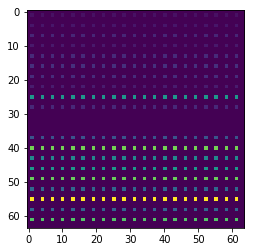

In [5]:
plt.imshow(image_hog_ck_data[0])

In [6]:
print(image_hog_ck_data[0])

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          2.22222233  0.         ...  2.22222233  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         37.33333206  0.         ... 37.33333206  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


/home/ferdinand/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


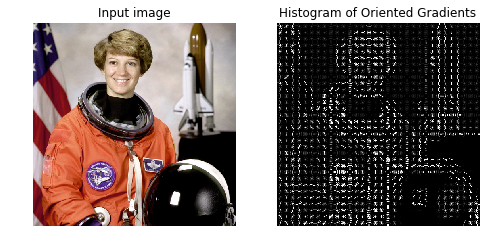

In [7]:
from skimage import data, exposure


image = data.astronaut()

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()
